## Exemplo classificação com SVM usando o dataset Iris

### O dataset Iris

- 50 exemplos de 3 diferentes especies de Iridáceas (150 total)
- Features: comprimento da sépala, largula da sépala, comprimento da pétala, largura da pétala

### Carregando os dados

In [ ]:
# importar o módulo load_iris de datasets
from sklearn.datasets import load_iris

In [ ]:
# salvar um objeto contendo os dados
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# nomes das features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# esquema de codificação: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# representação das classes
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.data[120])

[6.9 3.2 5.7 2.3]


In [ ]:
print(iris.target[120])
print(iris.target_names[iris.target[120]])

2
virginica


In [ ]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [ ]:
# armazena matriz de features em "X"
X = iris.data

# armazena vetor de resposta em "y"
y = iris.target

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import interp

In [ ]:
# Binarizar considerando elementos apenas as 2 primeiras classes
f = np.in1d(y,[0,1])
X, y = X[f], y[f]

In [ ]:
# Nomes das 2 primeiras classes
class_names = iris.target_names[:2]
print(class_names)

['setosa' 'versicolor']


In [ ]:
print(X.shape)

(100, 4)


In [ ]:
# Adicionar ruído nas features para deixar o problema mais difícil
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
print(X.shape)

(100, 804)


In [ ]:
# Separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(50, 804)
(50, 804)


In [ ]:
# Aprendizado
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [ ]:
print(y_test[31])
print(y_pred[31])

1
0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title)
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

In [ ]:
# Calcula matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [ ]:
print(cnf_matrix)

[[17  9]
 [ 7 17]]


Matriz de confusão (em quantidade de elementos)
[[17  9]
 [ 7 17]]


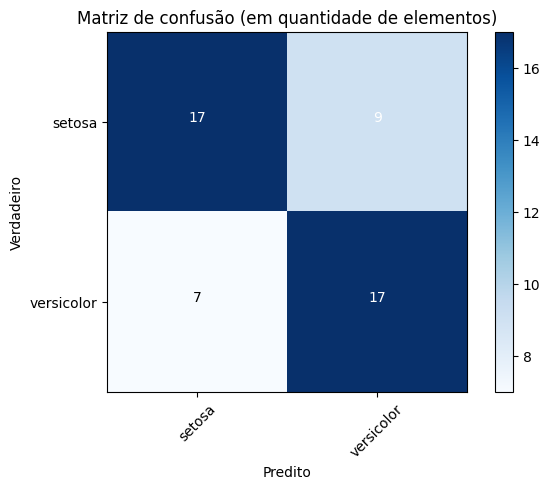

In [ ]:
title = 'Matriz de confusão (em quantidade de elementos)'

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title=title)

Matriz de confusão (em %)
[[0.65 0.35]
 [0.29 0.71]]


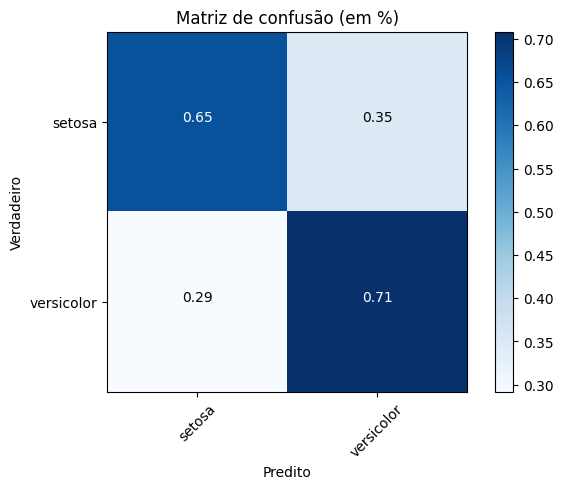

In [ ]:
title = 'Matriz de confusão (em %)'

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title=title, normalize=True)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print('Classificações corretas =', accuracy_score(y_test, y_pred, normalize=False))
print('Acurácia =', accuracy_score(y_test, y_pred))
print('Acurácia normalizada =', recall_score(y_test, y_pred, average='macro'))

Classificações corretas = 34
Acurácia = 0.68
Acurácia normalizada = 0.6810897435897436
